# 23. UL - Challenge

### 

Apply dimensionality reduction techniques to visualize the observations.
Apply clustering techniques to group together similar observations.
In each of the tasks above, try alternative methods and select a best performing one. Discuss how dimensionality reduction and clustering algorithms enable you to gain insights regarding the data.

Context
This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

Content
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

The question I am trying to answer is - Who are your target customers with whom you can start marketing strategy [easy to converse]


###### showing all rows and columns 
- pd.set_option('display.max_columns', 500)
- pd.set_option('display.max_rows', 500)

#### check code before submission
http://pep8online.com/

In [1]:
### importing all libraries

import random
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
%matplotlib inline 

from scipy.stats import boxcox

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.metrics import silhouette_score

from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# These two lines let you show all the columns and rows
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_rows', 500)

pd.set_option('display.max_columns', 500)

warnings.filterwarnings('ignore')

random.seed(3)

## Load the dataset

In [2]:
# Load single data-file
### For grading, data can be found here: https://www.kaggle.com/arjunbhasin2013/ccdata
df_temp = pd.read_csv('Mall_Customers.csv')

In [3]:
# lets look at some data to see how they look
df_temp.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df_temp.rename(columns = {'Annual Income (k$)':'Annual_Income', 'Spending Score (1-100)':'Spending_Score'}, inplace = True) 

In [5]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID        200 non-null int64
Gender            200 non-null object
Age               200 non-null int64
Annual_Income     200 non-null int64
Spending_Score    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
### Customer ID is not needed so dropping
df_temp.drop("CustomerID", axis = 1, inplace = True)

In [7]:
## Do we have any missing values?
df_temp.isnull().sum()*100/df_temp.isnull().count()

Gender            0.0
Age               0.0
Annual_Income     0.0
Spending_Score    0.0
dtype: float64

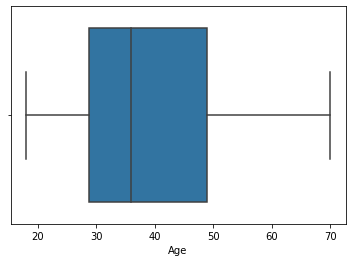

In [8]:
sns.boxplot(df_temp['Age'])

In [9]:
### 0 being Fully paid and 1 being Default
df_temp.Gender=df_temp.Gender.astype('category').cat.codes


In [10]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
Gender            200 non-null int8
Age               200 non-null int64
Annual_Income     200 non-null int64
Spending_Score    200 non-null int64
dtypes: int64(3), int8(1)
memory usage: 5.0 KB


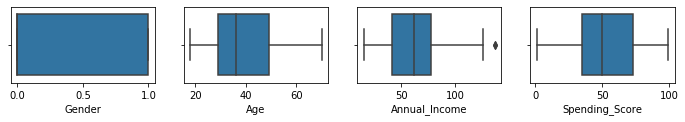

In [11]:
#Outlier detection
plt.figure(figsize=(15,25))
for n, i in enumerate(df_temp):
    n=n+1
    plt.subplot(15,5,n)
    sns.boxplot(df_temp[i])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23097050>,
      dtype=object)

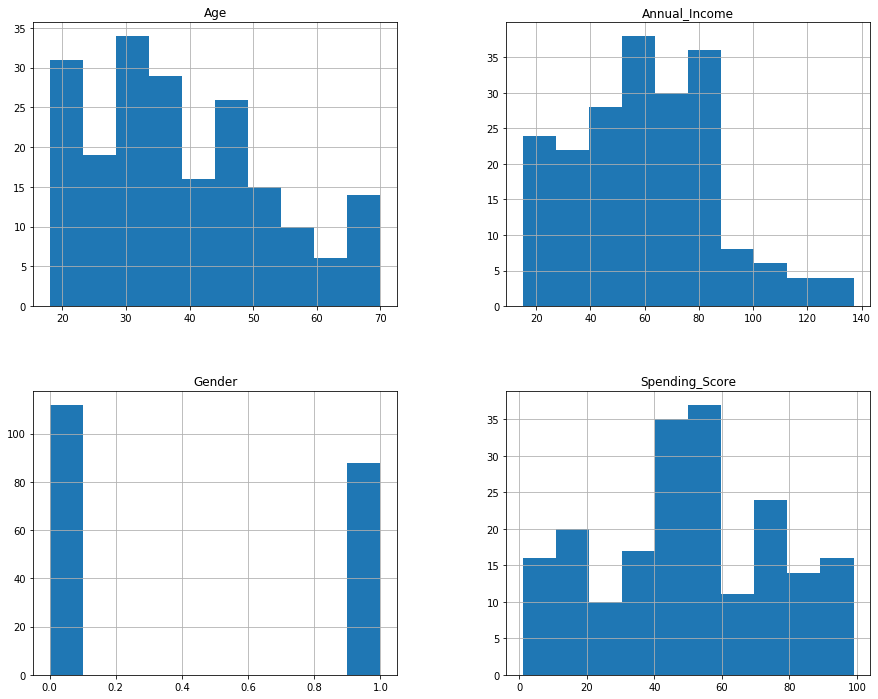

In [12]:
df_temp.hist(figsize=(15, 12))

In [13]:
#dealing with the outliers: lets see how the see scores look like and if we an remove some using that
from scipy import stats
z = np.abs(stats.zscore(df_temp))
print(z)

[[1.12815215 1.42456879 1.73899919 0.43480148]
 [1.12815215 1.28103541 1.73899919 1.19570407]
 [0.88640526 1.3528021  1.70082976 1.71591298]
 [0.88640526 1.13750203 1.70082976 1.04041783]
 [0.88640526 0.56336851 1.66266033 0.39597992]
 [0.88640526 1.20926872 1.66266033 1.00159627]
 [0.88640526 0.27630176 1.62449091 1.71591298]
 [0.88640526 1.13750203 1.62449091 1.70038436]
 [1.12815215 1.80493225 1.58632148 1.83237767]
 [0.88640526 0.6351352  1.58632148 0.84631002]
 [1.12815215 2.02023231 1.58632148 1.4053405 ]
 [0.88640526 0.27630176 1.58632148 1.89449216]
 [0.88640526 1.37433211 1.54815205 1.36651894]
 [0.88640526 1.06573534 1.54815205 1.04041783]
 [1.12815215 0.13276838 1.54815205 1.44416206]
 [1.12815215 1.20926872 1.54815205 1.11806095]
 [0.88640526 0.27630176 1.50998262 0.59008772]
 [1.12815215 1.3528021  1.50998262 0.61338066]
 [1.12815215 0.94373197 1.43364376 0.82301709]
 [0.88640526 0.27630176 1.43364376 1.8556706 ]
 [1.12815215 0.27630176 1.39547433 0.59008772]
 [1.12815215 

In [14]:
### save the original data
data_orig = df_temp.copy()

In [15]:
df_temp.describe()

,Gender,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


Data looks a bit better than before

### Data Preprocessing
* Standarizing the Data
    - I will standardize the data so I can use it with K means model. Since I am trying to segment the credit card users, Kmeans will be the good clustering algorithm to use
* How many clusters
* Reducing the dimension of the data


In [16]:
### standardising the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(df_temp)

### K means
- Takes a predetermined number of clusters.
- Finds the centroids for each of these clusters, essentially the means.
- Assigns each data point to its nearest cluster based on the squared Euclidean distance.
- Once trained clusters for new unseen data points can be identified based on Euclidean distance.

### How many clusters
* For k means algorithm of clustering we need a method to know the number of clusters. We can do this by
- using dendograms
- Elbow method 
- Silhoutte method
We will be using elbow method first and see how we do

#### Elbow Criterion Method:

The idea behind elbow method is to run k-means clustering on a given dataset for a range of values of k (e.g k=1 to 10), for each value of k, calculate sum of squared errors (SSE).

Calculate the mean distance between data points and their cluster centroid. Increasing the number of clusters(K) will always reduce the distance to data points, thus decrease this metric, to the extreme of reaching zero when K is as same as the number of data points. So the goal is to choose a small value of k that still has a low SSE.

We run the algorithm for different values of K(say K = 10 to 1) and plot the K values against SSE(Sum of Squared Errors). And select the value of K for the elbow point.

In [17]:
#using elbow method to determine the clusters
#consider upto 30 clusters
num_clusters = 30
n_inertias = np.zeros((1, num_clusters))
from sklearn.cluster import KMeans
for i in range(0, num_clusters):
    k_means = KMeans(i+1)
    k_means.fit(data_standardized)
    n_inertias[0, i] = k_means.inertia_

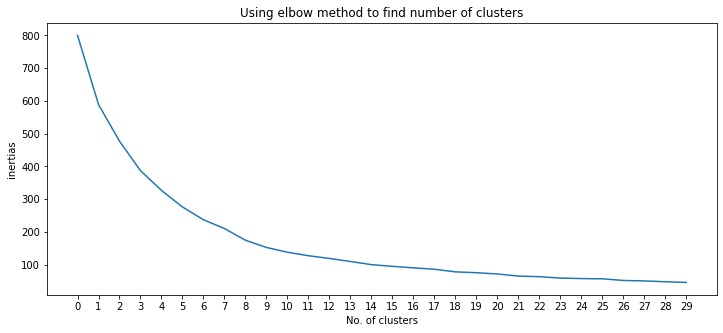

In [18]:
plt.figure(figsize =  (12, 5))
plt.plot(n_inertias.flatten())
plt.xticks(range(0, num_clusters, 1))
plt.title('Using elbow method to find number of clusters')
plt.xlabel('No. of clusters')
plt.ylabel('inertias')
plt.draw()

The elbow here is ambigious. It could be at 13, 14, 15,... so we will use Silhouette method - Reading from here 
* https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb.
* https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6
- The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

#### Silhouette Coefficient Method:

A higher Silhouette Coefficient score relates to a model with better-defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

The mean distance between a sample and all other points in the same class.
The mean distance between a sample and all other points in the next nearest cluster.

In [19]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
num_clusters_list = []
for n_clusters in range(2,30):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(data_standardized)
    centers = clusterer.cluster_centers_

    silhouette_scores.append(silhouette_score (data_standardized, preds, metric='euclidean'))
    num_clusters_list.append(n_clusters)

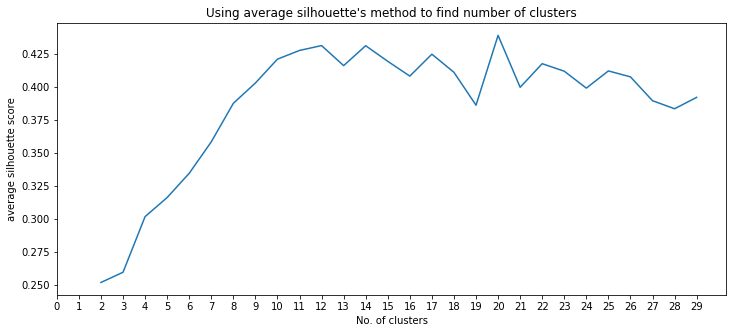

In [20]:
plt.figure(figsize = (12, 5))
plt.plot(num_clusters_list, silhouette_scores)
plt.xticks(range(0, 30, 1))
plt.title('Using average silhouette\'s method to find number of clusters')
plt.xlabel('No. of clusters')
plt.ylabel('average silhouette score')
plt.show()

There is a clear peak at 15 so 15 may be the optimal cluster. 

In [21]:
### might be good to see the solhouette score for the different clusters to actually
### see if 3 clusters are good or not - let look at 10 clusters
for cluster in range(2,25):
    kmeans = KMeans(n_clusters=cluster, random_state=40).fit_predict(data_standardized)
    sil_score = metrics.silhouette_score(data_standardized,kmeans, metric='euclidean')
    print("Silhouette score for {} cluster k-means: {:.3f}".format(cluster,
                                                               metrics.silhouette_score(data_standardized, kmeans, metric='euclidean')))

Silhouette score for 2 cluster k-means: 0.252
Silhouette score for 3 cluster k-means: 0.260
Silhouette score for 4 cluster k-means: 0.301
Silhouette score for 5 cluster k-means: 0.317
Silhouette score for 6 cluster k-means: 0.329
Silhouette score for 7 cluster k-means: 0.358
Silhouette score for 8 cluster k-means: 0.387
Silhouette score for 9 cluster k-means: 0.403
Silhouette score for 10 cluster k-means: 0.421
Silhouette score for 11 cluster k-means: 0.427
Silhouette score for 12 cluster k-means: 0.426
Silhouette score for 13 cluster k-means: 0.427
Silhouette score for 14 cluster k-means: 0.419
Silhouette score for 15 cluster k-means: 0.415
Silhouette score for 16 cluster k-means: 0.414
Silhouette score for 17 cluster k-means: 0.403
Silhouette score for 18 cluster k-means: 0.401
Silhouette score for 19 cluster k-means: 0.422
Silhouette score for 20 cluster k-means: 0.424
Silhouette score for 21 cluster k-means: 0.407
Silhouette score for 22 cluster k-means: 0.408
Silhouette score for 

Seems like silhoutte method gave us the correct cluster which is 11 or 13.

## Using models

### K means clustering
- We found out from the silhoutte method above that 3 clusters would be the best to use
- Trying K means with 11 clusters

In [22]:
kmeans_11 = KMeans(n_clusters=11, init="k-means++", n_init=10, max_iter=300) 
y_pred = kmeans_11.fit_predict(data_standardized)

In [23]:
### data standarize is a numpy array so we can't plot from that - makeing it a df with
### columns names same as the original colomns from CC df
data_standardized_df = pd.DataFrame(data_standardized, columns = df_temp.columns)
data_standardized_df.head()

,Gender,Age,Annual_Income,Spending_Score
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


In [24]:
### adding a column in the DF so we know which cluster that row belongs to
data_standardized_df["cluster"] = y_pred

In [25]:
df_temp_orig = df_temp.copy()

In [26]:
df_temp_orig["cluster"] = y_pred

In [27]:
### group by cluster
####
data_standardized_df.groupby('cluster').describe()

Gender                                                        \
         count      mean           std       min       25%       50%   
cluster                                                                
0          6.0  1.128152  0.000000e+00  1.128152  1.128152  1.128152   
1         18.0  1.128152  0.000000e+00  1.128152  1.128152  1.128152   
2         25.0 -0.886405  0.000000e+00 -0.886405 -0.886405 -0.886405   
3         15.0 -0.886405  3.447570e-16 -0.886405 -0.886405 -0.886405   
4         25.0 -0.886405  0.000000e+00 -0.886405 -0.886405 -0.886405   
5         24.0  1.128152  0.000000e+00  1.128152  1.128152  1.128152   
6         20.0  1.128152  0.000000e+00  1.128152  1.128152  1.128152   
7         21.0 -0.886405  0.000000e+00 -0.886405 -0.886405 -0.886405   
8         13.0 -0.886405  2.311114e-16 -0.886405 -0.886405 -0.886405   
9         20.0  1.128152  0.000000e+00  1.128152  1.128152  1.128152   
10        13.0 -0.886405  2.311114e-16 -0.886405 -0.886405 -0.886405   

                              Age                                          \
              75%       max count      mean       std       min       25%   
cluster                                                                     
0        1.128152  1.128152   6.0  1.194915  0.776607 -0.132768  0.961674   
1        1.128152  1.128152  18.0 -0.399900  0.315049 -0.850435 -0.635135   
2       -0.886405 -0.886405  25.0 -0.781539  0.478510 -1.496335 -1.137502   
3       -0.886405 -0.886405  15.0  0.412658  0.549780 -0.348068  0.010765   
4       -0.886405 -0.886405  25.0  1.093007  0.572232  0.297832  0.728432   
5        1.128152  1.128152  24.0 -0.976027  0.492349 -1.496335 -1.424569   
6        1.128152  1.128152  20.0  0.046648  0.900740 -1.424569 -0.437777   
7       -0.886405 -0.886405  21.0 -0.477932  0.220756 -0.850435 -0.635135   
8       -0.886405 -0.886405  13.0 -0.960846  0.374765 -1.352802 -1.209269   
9        1.128152  1.128152  20.0  1.428157  0.625593  0.584899  0.710490   
10      -0.886405 -0.886405  13.0  0.192942  0.736332 -1.352802 -0.276302   

                                      Annual_Income                      \
              50%       75%       max         count      mean       std   
cluster                                                                   
0        1.266682  1.733166  2.020232           6.0 -1.395474  0.231547   
1       -0.491602 -0.096885  0.082532          18.0  1.013441  0.722542   
2       -0.850435 -0.491602  0.082532          25.0 -0.122142  0.419123   
3        0.369598  0.764315  1.302565          15.0  1.212770  0.627464   
4        0.800199  1.517865  2.091999          25.0 -0.279400  0.334260   
5       -1.065735 -0.671019  0.082532          24.0 -0.737052  0.656233   
6        0.154298  0.602840  1.446099          20.0  0.938586  0.611874   
7       -0.491602 -0.276302 -0.061002          21.0  0.972848  0.540401   
8       -1.137502 -0.635135 -0.276302          13.0 -1.330880  0.314516   
9        1.446099  2.020232  2.235532          20.0 -0.267568  0.314381   
10       0.226065  0.728432  1.374332          13.0 -1.298583  0.296322   

                                                          Spending_Score  \
              min       25%       50%       75%       max          count   
cluster                                                                    
0       -1.586321 -1.576779 -1.490898 -1.233254 -1.051949            6.0   
1        0.322150  0.493912  0.837437  1.190504  2.917671           18.0   
2       -0.822933 -0.479408 -0.021375  0.169472  0.589336           25.0   
3        0.474828  0.665675  1.047369  1.581741  2.497807           15.0   
4       -0.861102 -0.517577 -0.250391 -0.021375  0.245811           25.0   
5       -1.738999 -1.366847 -0.632086 -0.202680  0.245811           24.0   
6        0.398489  0.598878  0.722929  1.018742  2.917671           20.0   
7        0.360319  0.627505  0.703844  1.390894  2.268791           21.0   
8       -1.700830 -1.586321 -1.43

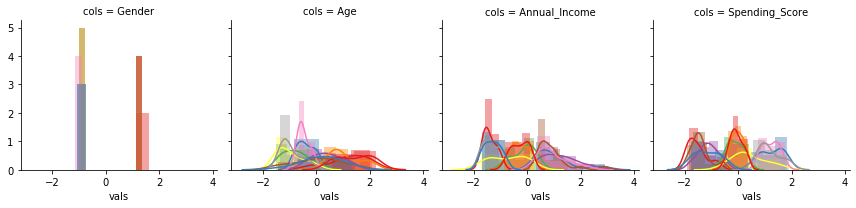

In [28]:
cols = list(data_standardized_df.columns)

df = data_standardized_df.melt(['cluster'], var_name='cols',  value_name='vals')

g = sns.FacetGrid(df, col='cols', hue="cluster", palette="Set1")

g = (g.map(sns.distplot, "vals"))

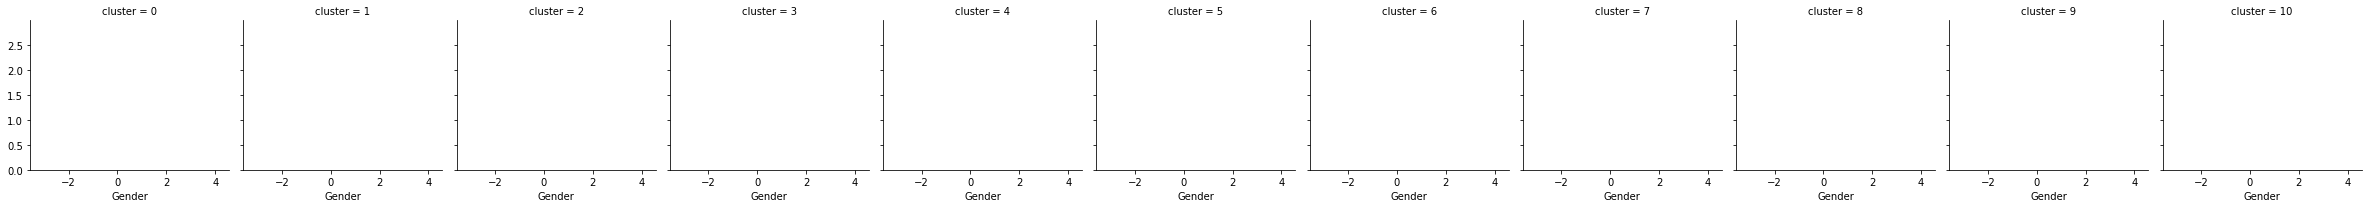

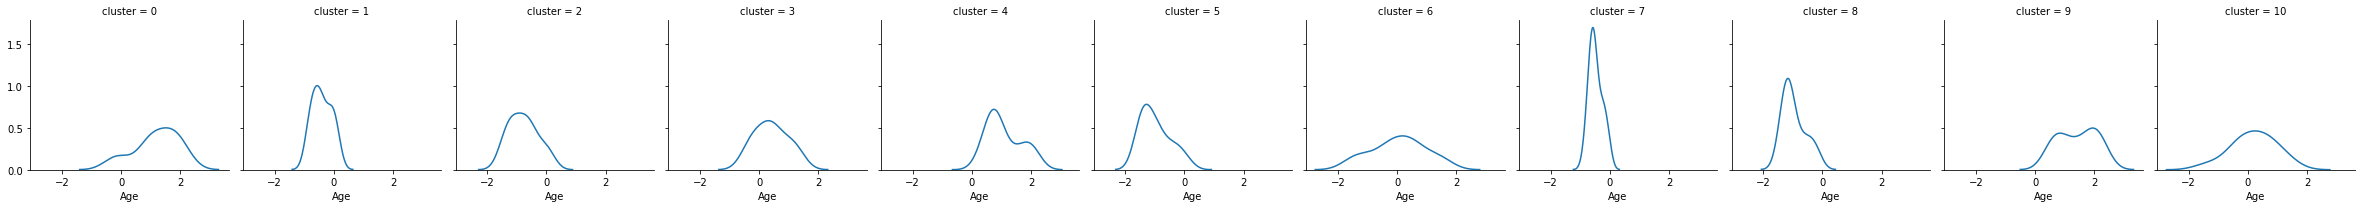

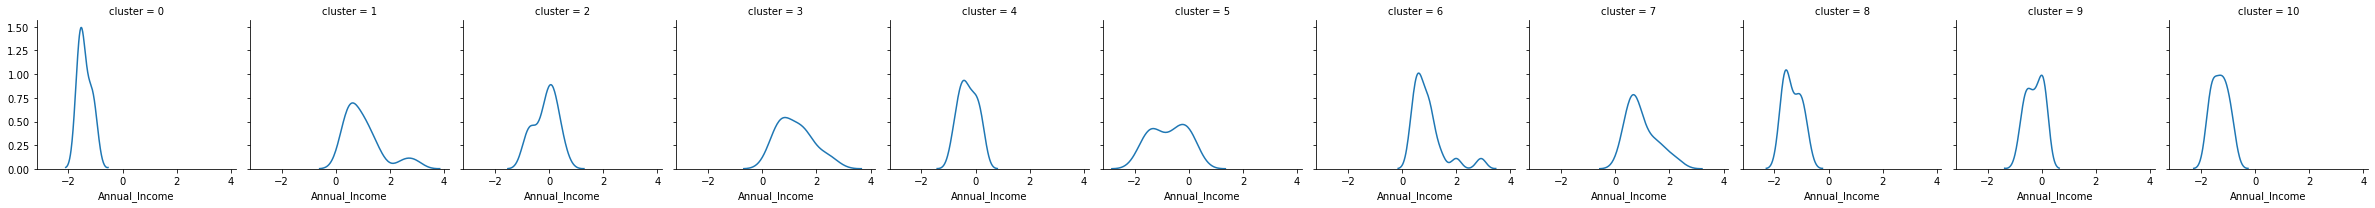

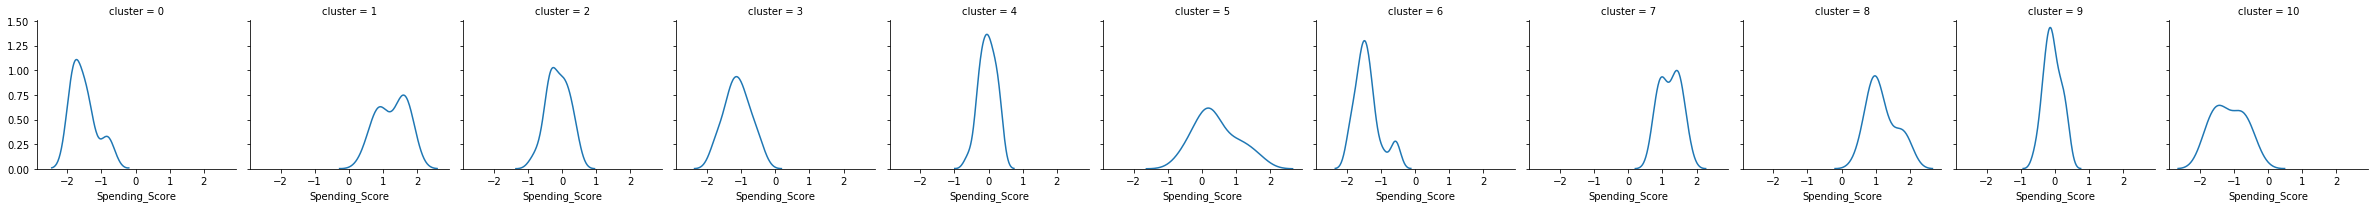

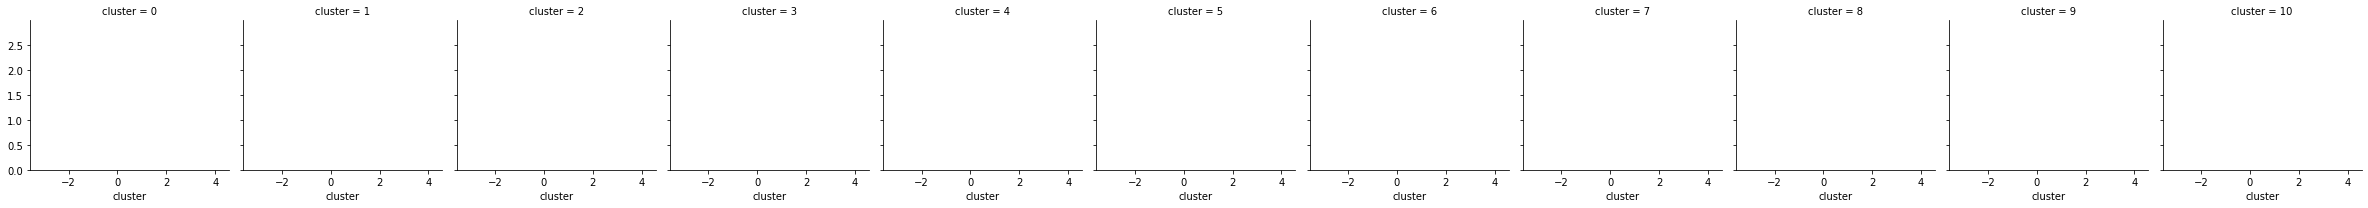

In [29]:
cols = list(data_standardized_df.columns)
for x in range(0,len(cols)):
    g = sns.FacetGrid(data_standardized_df, col='cluster')
    g = g.map(sns.kdeplot, cols[x])

In [30]:
data_standardized_df['cluster'].value_counts()

4     25
2     25
5     24
7     21
9     20
6     20
1     18
3     15
10    13
8     13
0      6
Name: cluster, dtype: int64

#### Modeling: K Means summary
* Cluster 10: These are people with high annual income and high spending scores and are young at age. 
* Cluster 6 and 7 are people with lowest annual income 
* Cluster 4 are the oldest people.


Using PCA to identify the features that describes the best variance in the features

In [31]:
data_standardized_pca = data_standardized.copy()

In [32]:
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_pca = pca.fit_transform(data_standardized_pca) 
X_pca = pd.DataFrame(X_pca) 
X_pca.columns = ['P1', 'P2'] 
  
X_pca.head(2)

,P1,P2
0,-0.406383,-0.520714
1,-1.427673,-0.367310


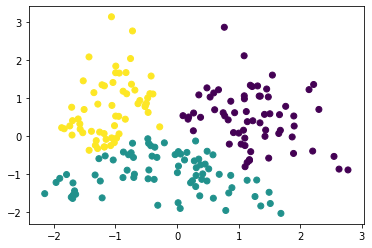

In [33]:
plt.scatter(X_pca['P1'], X_pca['P2'],
            c = KMeans(n_clusters=3, random_state=40).fit_predict(X_pca), cmap =None) 
plt.show()



In [34]:
print(pca.explained_variance_ratio_)

[0.33690046 0.26230645]


The first component describes 33.06% of the variance in data and the 2nd 26.2% of the variance of the data. Total PCA describes about ~59% of variance in the data. there is ~41% of unknown variance in the data.


In [35]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_group=data_standardized_df.groupby('cluster').apply(lambda x: x[cols].mean()).T
cluster_group

cluster,0,1,2,3,4,5,6,7,8,9,10
Gender,1.128152,1.128152,-0.886405,-0.886405,-0.886405,1.128152,1.128152,-0.886405,-0.886405,1.128152,-0.886405
Age,1.194915,-0.399900,-0.781539,0.412658,1.093007,-0.976027,0.046648,-0.477932,-0.960846,1.428157,0.192942
Annual_Income,-1.395474,1.013441,-0.122142,1.212770,-0.279400,-0.737052,0.938586,0.972848,-1.330880,-0.267568,-1.298583
Spending_Score,-1.515335,1.260407,-0.119570,-1.110297,-0.026399,0.416038,-1.403399,1.221585,1.177786,-0.064056,-1.145535
cluster,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000


In [36]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_group_orig=df_temp_orig.groupby('cluster').apply(lambda x: x[cols].mean()).T
cluster_group_orig

cluster,0,1,2,3,4,5,6,7,8,9,10
Gender,1.000000,1.000000,0.00,0.000000,0.00,1.000000,1.00,0.000000,0.000000,1.00,0.000000
Age,55.500000,33.277778,27.96,44.600000,54.08,25.250000,39.50,32.190476,25.461538,58.75,41.538462
Annual_Income,24.000000,87.111111,57.36,92.333333,53.24,41.250000,85.15,86.047619,25.692308,53.55,26.538462
Spending_Score,11.166667,82.666667,47.12,21.600000,49.52,60.916667,14.05,81.666667,80.538462,48.55,20.692308
cluster,0.000000,1.000000,2.00,3.000000,4.00,5.000000,6.00,7.000000,8.000000,9.00,10.000000


##  Hierarchical Clustering

In [37]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(data_standardized)

In [38]:
for cluster in range(2,15):
        agglomerative = AgglomerativeClustering(linkage='complete', affinity='cosine', n_clusters=cluster).fit_predict(data_standardized)
        sil_score = metrics.silhouette_score(data_standardized, agglomerative, metric='euclidean')
        print("Silhouette score for {} cluster k-means,linkage = 'complete' : {:.3f}".format(cluster,sil_score))
        

Silhouette score for 2 cluster k-means,linkage = 'complete' : 0.278
Silhouette score for 3 cluster k-means,linkage = 'complete' : 0.206
Silhouette score for 4 cluster k-means,linkage = 'complete' : 0.260
Silhouette score for 5 cluster k-means,linkage = 'complete' : 0.259
Silhouette score for 6 cluster k-means,linkage = 'complete' : 0.293
Silhouette score for 7 cluster k-means,linkage = 'complete' : 0.325
Silhouette score for 8 cluster k-means,linkage = 'complete' : 0.350
Silhouette score for 9 cluster k-means,linkage = 'complete' : 0.376
Silhouette score for 10 cluster k-means,linkage = 'complete' : 0.400
Silhouette score for 11 cluster k-means,linkage = 'complete' : 0.393
Silhouette score for 12 cluster k-means,linkage = 'complete' : 0.391
Silhouette score for 13 cluster k-means,linkage = 'complete' : 0.353
Silhouette score for 14 cluster k-means,linkage = 'complete' : 0.363


Looks like 10 clusters has the highest silhouetee score

In [39]:
for cluster in range(2,20):
        agglomerative = AgglomerativeClustering(linkage="ward", affinity='euclidean', n_clusters=cluster).fit_predict(data_standardized)
        sil_score = metrics.silhouette_score(data_standardized, agglomerative, metric='euclidean')
        print("Silhouette score for {} cluster k-means, linkage = 'ward': {:.3f}".format(cluster,sil_score))

Silhouette score for 2 cluster k-means, linkage = 'ward': 0.242
Silhouette score for 3 cluster k-means, linkage = 'ward': 0.248
Silhouette score for 4 cluster k-means, linkage = 'ward': 0.263
Silhouette score for 5 cluster k-means, linkage = 'ward': 0.287
Silhouette score for 6 cluster k-means, linkage = 'ward': 0.310
Silhouette score for 7 cluster k-means, linkage = 'ward': 0.346
Silhouette score for 8 cluster k-means, linkage = 'ward': 0.379
Silhouette score for 9 cluster k-means, linkage = 'ward': 0.392
Silhouette score for 10 cluster k-means, linkage = 'ward': 0.418
Silhouette score for 11 cluster k-means, linkage = 'ward': 0.425
Silhouette score for 12 cluster k-means, linkage = 'ward': 0.424
Silhouette score for 13 cluster k-means, linkage = 'ward': 0.420
Silhouette score for 14 cluster k-means, linkage = 'ward': 0.425
Silhouette score for 15 cluster k-means, linkage = 'ward': 0.434
Silhouette score for 16 cluster k-means, linkage = 'ward': 0.439
Silhouette score for 17 cluster k

In [40]:
for cluster in range(2,20):
        agglomerative = AgglomerativeClustering(linkage="average", affinity='cosine', n_clusters=cluster).fit_predict(data_standardized)
        sil_score = metrics.silhouette_score(data_standardized, agglomerative, metric='euclidean')
        print("Silhouette score for {} cluster k-means, linkage = 'average': {:.3f}".format(cluster,sil_score))

Silhouette score for 2 cluster k-means, linkage = 'average': 0.236
Silhouette score for 3 cluster k-means, linkage = 'average': 0.230
Silhouette score for 4 cluster k-means, linkage = 'average': 0.257
Silhouette score for 5 cluster k-means, linkage = 'average': 0.296
Silhouette score for 6 cluster k-means, linkage = 'average': 0.298
Silhouette score for 7 cluster k-means, linkage = 'average': 0.338
Silhouette score for 8 cluster k-means, linkage = 'average': 0.380
Silhouette score for 9 cluster k-means, linkage = 'average': 0.400
Silhouette score for 10 cluster k-means, linkage = 'average': 0.396
Silhouette score for 11 cluster k-means, linkage = 'average': 0.389
Silhouette score for 12 cluster k-means, linkage = 'average': 0.328
Silhouette score for 13 cluster k-means, linkage = 'average': 0.333
Silhouette score for 14 cluster k-means, linkage = 'average': 0.284
Silhouette score for 15 cluster k-means, linkage = 'average': 0.310
Silhouette score for 16 cluster k-means, linkage = 'aver

### GMM

In [41]:
for cluster in range(2,20,2):
    for covariance_type in ['full', 'tied', 'diag', 'spherical']:
        gmm  = GaussianMixture(n_components = cluster,covariance_type = covariance_type, random_state = 40).fit_predict(data_standardized)
        sil_score = metrics.silhouette_score(data_standardized, gmm, metric='euclidean')
        print("Silhouette score for {} cluster k-means, using {} covariance is : {:.3f}".format(cluster,covariance_type,sil_score))
        

Silhouette score for 2 cluster k-means, using full covariance is : 0.246
Silhouette score for 2 cluster k-means, using tied covariance is : 0.252
Silhouette score for 2 cluster k-means, using diag covariance is : 0.222
Silhouette score for 2 cluster k-means, using spherical covariance is : 0.252
Silhouette score for 4 cluster k-means, using full covariance is : 0.258
Silhouette score for 4 cluster k-means, using tied covariance is : 0.275
Silhouette score for 4 cluster k-means, using diag covariance is : 0.276
Silhouette score for 4 cluster k-means, using spherical covariance is : 0.266
Silhouette score for 6 cluster k-means, using full covariance is : 0.236
Silhouette score for 6 cluster k-means, using tied covariance is : 0.309
Silhouette score for 6 cluster k-means, using diag covariance is : 0.247
Silhouette score for 6 cluster k-means, using spherical covariance is : 0.216
Silhouette score for 8 cluster k-means, using full covariance is : 0.294
Silhouette score for 8 cluster k-mea

## DBSCAN

In [42]:
dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(data_standardized)

print("Number of clusters when min_samples=1 is: {}".format(len(np.unique(clusters))))

print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(data_standardized, clusters, metric='euclidean')))
for i in range(2,20):
    dbscan_cluster = DBSCAN(eps=1, min_samples=i, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(data_standardized)
    sil_score = metrics.silhouette_score(data_standardized, clusters, metric='euclidean')
    print("Number of clusters and silhouette score when min_samples={} is: {} and {}".format(i, len(np.unique(clusters)),sil_score))

Number of clusters when min_samples=1 is: 8
The silhouette score of the DBSCAN solution: 0.06236135998754358
Number of clusters and silhouette score when min_samples=2 is: 7 and 0.09650323413716073
Number of clusters and silhouette score when min_samples=3 is: 4 and 0.21256267605040682
Number of clusters and silhouette score when min_samples=4 is: 4 and 0.21256267605040682
Number of clusters and silhouette score when min_samples=5 is: 3 and 0.2543871824295202
Number of clusters and silhouette score when min_samples=6 is: 3 and 0.2543871824295202
Number of clusters and silhouette score when min_samples=7 is: 3 and 0.2543871824295202
Number of clusters and silhouette score when min_samples=8 is: 3 and 0.2516159054507508
Number of clusters and silhouette score when min_samples=9 is: 4 and 0.19099916485787014
Number of clusters and silhouette score when min_samples=10 is: 3 and 0.23366261432506327
Number of clusters and silhouette score when min_samples=11 is: 3 and 0.22070245084472062
Num

In [43]:
dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(data_standardized)

print("Number of clusters when eps=1 is: {}".format(len(np.unique(clusters))))
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(data_standardized, clusters, metric='euclidean')))

for i in [1,2,3,4,5,6,7,8,9]:
    dbscan_cluster = DBSCAN(eps=i, min_samples=1, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(data_standardized)
    sil_score = metrics.silhouette_score(data_standardized, clusters, metric='euclidean')
    print("Number of clusters and silhouette score when eps={}  is: {} and {}".format(i, len(np.unique(clusters)),sil_score))

Number of clusters when eps=1 is: 8
The silhouette score of the DBSCAN solution: 0.06236135998754358
Number of clusters and silhouette score when eps=1  is: 8 and 0.06236135998754358
Number of clusters and silhouette score when eps=2  is: 2 and 0.2776035125578272


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

Its giving me an error because silhoutte scores need to be starting at 2 so when the cluster hits 2, it gives an error. But I can see what I needed to see here - I wanted to see if DBscan will provide better results and I can see that with ep = 6 I get a 66% silhourtte score. I will run this with min sample 14 and ep = 6

In [44]:
dbscan_cluster = DBSCAN(eps=1, min_samples=11, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(data_standardized)

print("Number of clusters when min_samples=11 is: {}".format(len(np.unique(clusters))))

print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(data_standardized, clusters, metric='euclidean')))

Number of clusters when min_samples=11 is: 3
The silhouette score of the DBSCAN solution: 0.22070245084472062


This gives me a 22% sihoutte score

# Summary

This project is about segmenting mall customers based on their age, spending scores and annual income

The dataset was pretty good. I checked for missing values and I removed the unnecessary column. I also used data explorations and use that to help clean the dataset. For example, a lot of the features such as Customer ID and such are irrelavant to identifying their spending habit. that column was dropped.

After much data cleaning and exploration, I came down to the 4 features that could be closely related to my segmentation problem. Once the dataset was ready, I used 4 unsupervised learning models - K means, Hierarchical clustering, GMM, and DBSCAN models and applied this dataset on all 4 of them. The results are as follows:

Out of all 4 models,Kmeans seemed like it did the best with the highest silhoutte score. 

- K Means: 42.7%

- Hierarchical Clustering
Complete: 40.0%
Ward:     42.5%
Average:  40.0%

- GMM
Full covariance: 39.8%
Tied covariance: 42.3%
Diag covariance: 41.5%
Spherical covariance: 42.2%

- DBSCAN               
ep=1, min_samples=14: 25.4%
eps=6, min_samples=14: 22%


I also had some recommendations for the Credit card company based on my models
* Cluster 10: These are people with high annual income and high spending scores and are young at age. So provide more marketing and icentive for them. 
* Cluster 6 and 7 are people with lowest annual income - send them sale information
* Cluster 4 are the oldest people. 
